In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json
import sys
from io import StringIO

In [2]:
data_dir = "./latexData/metrics"

# List all files in the directory
files = os.listdir(data_dir)

print("Files in directory:", files)

Files in directory: ['metrics_0006_broadcast_2025-04-06T13-53-26.json', 'metrics_0006_real_2025-04-06T13-58-08.json', 'metrics_0006_SelfdrivingCar_2025-04-06T14-07-04.json', 'metrics_0008_ROSE_2025-04-06T14-09-07.json', 'metrics_0012_broadcast_2025-04-06T14-37-00.json', 'metrics_0013_Motor_2025-04-06T14-12-59.json', 'metrics_0021_ROSE_2025-04-06T14-15-20.json', 'metrics_0026_ROSE_2025-04-06T14-17-50.json', 'metrics_0061_Singulate_2025-04-06T14-34-19.json', 'metrics_S_0050_dense_2025-04-10T21-11-22.json', 'metrics_S_0050_sparse_2025-04-06T14-40-10.json', 'metrics_S_0100_Dense_2025-04-06T15-03-27.json', 'metrics_S_0100_sparse_2025-04-06T14-49-57.json', 'metrics_S_0150_Dense_2025-04-06T17-53-47.json', 'metrics_S_0150_Sparce_2025-04-06T16-06-03.json', 'old']


In [3]:
def get_df(filename: str) -> pd.DataFrame:
    
    # Read the json file to a dictionary
    # Inside the json file, there is a csvSummary key, which contains the csv file
    # Furthermore we need the data set information, e.g.:
    # "dataset": {
    #     "title": "MotorControlSystem",
    #     "description": "Metrics results for multiple visualizations",
    #     "timestamp": "2025-04-03T23-31-24",
    #     "nodeCount": 13,
    #     "connectionCount": 15,
    #     "visualizationCount": 13
    # },
    
    # Cols we want to have:
    # Visualization Name
    # Visualization Type
    # Data title
    # One col for each metric
    
    data = {}
        
    with open(os.path.join(data_dir, filename), 'r') as f:
        data = f.read()
        # Parse the json data
        data = json.loads(data)
    
    df_data = []   
    
    for vis_key in data["visualizations"]:
        vis = data["visualizations"][vis_key]
        vis_data = dict()
        
        # Get the visualization name and type
        vis_data["name"] = vis["name"]
        vis_data["type"] = vis["type"]
        
        v_type: str = vis["type"]
        v_name: str = vis["name"]
        if v_type == "viscom":
            if "comm" in v_name.lower():
                vis_data["type"] = "viscomComm"
            elif "virtual" in v_name.lower():
                vis_data["type"] = "viscomVirtual"
            else:
                vis_data["type"] = "viscomDefault"
        
        # Get the metrics for this visualization        
        for metric in vis["metrics"]:
            vis_data[metric] = vis["metrics"][metric]["value"]
            # vis_data["metric_type"] = vis["metrics"][metric]["definition"]["optimum"]
        
        df_data.append(vis_data)
        
    df = pd.DataFrame(df_data)
        
    # csv_summary = data.get("csvSummary")
    # if csv_summary is None:
    #     raise ValueError(f"csvSummary not found in {filename}")
    
    # # Pass csv_summary as buffer to pandas read_csv
    # csv_buffer = StringIO(csv_summary)
    # df = pd.read_csv(csv_buffer, sep=",")
    
    df["title"] = data["dataset"]["title"]
    df["nodes"] = data["dataset"]["nodeCount"]
    df["connections"] = data["dataset"]["connectionCount"]
    
    return df

In [4]:
len(files)

16

In [5]:
df = get_df(files[0])
df

,name,type,aspectRatio,edgeCrossings,pathEfficiencyRatio,pathEfficiencyRatioNormalized,stress,pathContinuity,weightedPathContinuity,pathAngularPrediction,nodeEdgeOverlaps,nodeNodeOverlaps,title,nodes,connections
0,viscom_Default,viscomDefault,0.942570,0.222222,0.911163,0.994644,0.684071,0.699304,0.699335,0.125254,1.000000,1.000000,0006_real,6,101
1,viscom_CommWoRot,viscomComm,0.824637,0.066667,0.791132,0.924964,0.605756,0.759948,0.709511,0.363263,1.000000,1.000000,0006_real,6,101
2,viscom_CommWRot,viscomComm,0.802938,0.044444,0.806550,0.945106,0.607599,0.645941,0.700171,0.767224,1.000000,1.000000,0006_real,6,101
3,viscom_Virtual,viscomVirtual,0.469686,0.068027,0.923127,0.991553,0.166561,0.693615,0.701420,0.108580,1.000000,1.000000,0006_real,6,101
4,viscom_DefaultCloser,viscomDefault,0.930575,0.222222,0.863725,0.998155,0.684071,0.699304,0.699335,0.125254,1.000000,1.000000,0006_real,6,101
5,viscom_CommWoRotCloser,viscomComm,0.848045,0.088889,0.736731,0.920352,0.608259,0.759922,0.709509,0.363142,1.000000,1.000000,0006_real,6,101
6,viscom_CommWRotCloser,viscomComm,0.829689,0.044444,0.751296,0.945759,0.611392,0.645890,0.700167,0.765807,1.000000,1.000000,0006_real,6,101
7,viscom_VirtualCloser,viscomVirtual,0.469461,0.068027,0.884281,0.995470,0.158946,0.693615,0.701420,0.108580,1.000000,1.000000,0006_real,6,101
8,viscom_DefaultFarther,viscomDefault,0.960176,0.222222,0.942990,0.991740,0.684071,0.699304,0.699335,0.125254,1.000000,1.000000,0006_real,6,101
9,viscom_CommWoRotCloserFarther,viscomComm,0.762514,0.066667,0.836801,0.928397,0.593074,0.760826,0.709588,0.367297,1.000000,1.000000,0006_real,6,101


In [6]:
df["name"].nunique()

49

In [7]:
concatenated_df: pd.DataFrame = None # type: ignore

for file in files:
    
    # Skip the file if it is a directory
    if os.path.isdir(file):
        continue
    
    # Check if the file is a json file
    if not file.endswith(".json"):
        continue
    
    df = get_df(file)
    print(f"File: {file}, Rows: {len(df)}")
    if concatenated_df is None:
        concatenated_df = df
    else:
        concatenated_df = pd.concat([concatenated_df, df], ignore_index=True)

concatenated_df

File: metrics_0006_broadcast_2025-04-06T13-53-26.json, Rows: 49
File: metrics_0006_real_2025-04-06T13-58-08.json, Rows: 49
File: metrics_0006_SelfdrivingCar_2025-04-06T14-07-04.json, Rows: 49
File: metrics_0008_ROSE_2025-04-06T14-09-07.json, Rows: 49
File: metrics_0012_broadcast_2025-04-06T14-37-00.json, Rows: 49
File: metrics_0013_Motor_2025-04-06T14-12-59.json, Rows: 49
File: metrics_0021_ROSE_2025-04-06T14-15-20.json, Rows: 49
File: metrics_0026_ROSE_2025-04-06T14-17-50.json, Rows: 49
File: metrics_0061_Singulate_2025-04-06T14-34-19.json, Rows: 49
File: metrics_S_0050_dense_2025-04-10T21-11-22.json, Rows: 49
File: metrics_S_0050_sparse_2025-04-06T14-40-10.json, Rows: 49
File: metrics_S_0100_Dense_2025-04-06T15-03-27.json, Rows: 49
File: metrics_S_0100_sparse_2025-04-06T14-49-57.json, Rows: 49
File: metrics_S_0150_Dense_2025-04-06T17-53-47.json, Rows: 49
File: metrics_S_0150_Sparce_2025-04-06T16-06-03.json, Rows: 49


C:\Users\schoc\AppData\Local\Temp\ipykernel_31480\2966520477.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  concatenated_df = pd.concat([concatenated_df, df], ignore_index=True)


,name,type,aspectRatio,edgeCrossings,pathEfficiencyRatio,pathEfficiencyRatioNormalized,stress,pathContinuity,weightedPathContinuity,pathAngularPrediction,nodeEdgeOverlaps,nodeNodeOverlaps,title,nodes,connections
0,viscom_Default,viscomDefault,0.942570,0.222222,0.911163,0.994644,0.684071,0.699304,0.699335,0.125254,1.000000,1.000000,0006_real,6,101
1,viscom_CommWoRot,viscomComm,0.824637,0.066667,0.791132,0.924964,0.605756,0.759948,0.709511,0.363263,1.000000,1.000000,0006_real,6,101
2,viscom_CommWRot,viscomComm,0.802938,0.044444,0.806550,0.945106,0.607599,0.645941,0.700171,0.767224,1.000000,1.000000,0006_real,6,101
3,viscom_Virtual,viscomVirtual,0.469686,0.068027,0.923127,0.991553,0.166561,0.693615,0.701420,0.108580,1.000000,1.000000,0006_real,6,101
4,viscom_DefaultCloser,viscomDefault,0.930575,0.222222,0.863725,0.998155,0.684071,0.699304,0.699335,0.125254,1.000000,1.000000,0006_real,6,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,spaceFilling_Setting_44,spaceFilling,0.932447,0.036780,1.000000,1.000000,0.221143,0.562044,0.505238,0.505383,0.996404,0.999732,S_0150_Sparce,150,249
731,spaceFilling_Setting_45,spaceFilling,0.925323,0.044987,1.000000,1.000000,0.220455,0.622333,0.594930,0.611654,0.999210,1.000000,S_0150_Sparce,150,249
732,spaceFilling_Setting_46,spaceFilling,0.993659,0.023362,1.000000,0.992181,0.201474,0.493759,0.445543,0.464415,0.988966,0.995973,S_0150_Sparce,150,249
733,spaceFilling_Setting_47,spaceFilling,0.997091,0.031740,1.000000,1.000000,0.195556,0.497158,0.465634,0.519741,0.998229,0.999732,S_0150_Sparce,150,249


In [8]:
print(len(concatenated_df))
concatenated_df.columns

735


Index(['name', 'type', 'aspectRatio', 'edgeCrossings', 'pathEfficiencyRatio',
       'pathEfficiencyRatioNormalized', 'stress', 'pathContinuity',
       'weightedPathContinuity', 'pathAngularPrediction', 'nodeEdgeOverlaps',
       'nodeNodeOverlaps', 'title', 'nodes', 'connections'],
      dtype='object')

In [9]:
concatenated_df.groupby("type").count()

,name,aspectRatio,edgeCrossings,pathEfficiencyRatio,pathEfficiencyRatioNormalized,stress,pathContinuity,weightedPathContinuity,pathAngularPrediction,nodeEdgeOverlaps,nodeNodeOverlaps,title,nodes,connections
type,,,,,,,,,,,,,,
arc,45,45,45,45,45,45,45,45,42,45,45,45,45,45
fdg,150,140,140,140,140,140,140,140,130,140,140,150,150,150
graphviz,45,45,45,45,45,45,45,45,42,45,45,45,45,45
radial,105,105,102,105,105,105,105,105,98,105,105,105,105,105
spaceFilling,210,209,209,209,209,209,209,209,195,209,209,210,210,210
viscomComm,90,90,90,90,90,90,90,90,84,90,90,90,90,90
viscomDefault,45,45,45,45,45,45,45,45,42,45,45,45,45,45
viscomVirtual,45,45,45,45,45,45,45,45,42,45,45,45,45,45


In [10]:
columns_to_filter_out = [
    "name",
    "nodes",
    "connections",
]

relevant_df = concatenated_df.copy()
for col in columns_to_filter_out:
    relevant_df = relevant_df.drop(columns=[col])
relevant_df

,type,aspectRatio,edgeCrossings,pathEfficiencyRatio,pathEfficiencyRatioNormalized,stress,pathContinuity,weightedPathContinuity,pathAngularPrediction,nodeEdgeOverlaps,nodeNodeOverlaps,title
0,viscomDefault,0.942570,0.222222,0.911163,0.994644,0.684071,0.699304,0.699335,0.125254,1.000000,1.000000,0006_real
1,viscomComm,0.824637,0.066667,0.791132,0.924964,0.605756,0.759948,0.709511,0.363263,1.000000,1.000000,0006_real
2,viscomComm,0.802938,0.044444,0.806550,0.945106,0.607599,0.645941,0.700171,0.767224,1.000000,1.000000,0006_real
3,viscomVirtual,0.469686,0.068027,0.923127,0.991553,0.166561,0.693615,0.701420,0.108580,1.000000,1.000000,0006_real
4,viscomDefault,0.930575,0.222222,0.863725,0.998155,0.684071,0.699304,0.699335,0.125254,1.000000,1.000000,0006_real
...,...,...,...,...,...,...,...,...,...,...,...,...
730,spaceFilling,0.932447,0.036780,1.000000,1.000000,0.221143,0.562044,0.505238,0.505383,0.996404,0.999732,S_0150_Sparce
731,spaceFilling,0.925323,0.044987,1.000000,1.000000,0.220455,0.622333,0.594930,0.611654,0.999210,1.000000,S_0150_Sparce
732,spaceFilling,0.993659,0.023362,1.000000,0.992181,0.201474,0.493759,0.445543,0.464415,0.988966,0.995973,S_0150_Sparce
733,spaceFilling,0.997091,0.031740,1.000000,1.000000,0.195556,0.497158,0.465634,0.519741,0.998229,0.999732,S_0150_Sparce


In [11]:
# What we want to have:
# Metric Title Type1 Type2 ... TypeN

datasets = relevant_df["title"].unique()
types = relevant_df["type"].unique()
metrics = [c for c in list(relevant_df.columns) if c not in ["type", "title"]]
print("Datasets:", datasets)
print("Types:", types)
print("Metrics:", metrics)


Datasets: ['0006_real' '0006_ROSE' '0006_SelfdrivingCar' '0008_ROSE'
 '0012_broadcast' '0013_Motor' '0021_ROSE' '0026_ROSE' '0061_Singulate'
 'S_0050_dense' 'S_0050_Sparce' 'S_0100_Dense' 'S_0100_sparse'
 'S_0150_Dense' 'S_0150_Sparce']
Types: ['viscomDefault' 'viscomComm' 'viscomVirtual' 'radial' 'fdg' 'graphviz'
 'arc' 'spaceFilling']
Metrics: ['aspectRatio', 'edgeCrossings', 'pathEfficiencyRatio', 'pathEfficiencyRatioNormalized', 'stress', 'pathContinuity', 'weightedPathContinuity', 'pathAngularPrediction', 'nodeEdgeOverlaps', 'nodeNodeOverlaps']


In [12]:
# relevant_df[(relevant_df["title"] == datasets[0])]
relevant_df[(relevant_df["title"] == datasets[0]) & (relevant_df["type"] == types[0])]

,type,aspectRatio,edgeCrossings,pathEfficiencyRatio,pathEfficiencyRatioNormalized,stress,pathContinuity,weightedPathContinuity,pathAngularPrediction,nodeEdgeOverlaps,nodeNodeOverlaps,title
0,viscomDefault,0.942570,0.222222,0.911163,0.994644,0.684071,0.699304,0.699335,0.125254,1.0,1.0,0006_real
4,viscomDefault,0.930575,0.222222,0.863725,0.998155,0.684071,0.699304,0.699335,0.125254,1.0,1.0,0006_real
8,viscomDefault,0.960176,0.222222,0.942990,0.991740,0.684071,0.699304,0.699335,0.125254,1.0,1.0,0006_real


In [13]:
combined_data_list = []
for dataset in datasets:
    for metric in metrics:
        for t in types:
            # Get the value for this dataset, metric and type
            # Get the relevant rows for this dataset and metric
            relevant_rows = relevant_df[(relevant_df["title"] == dataset) & (relevant_df["type"] == t)]
            
            if len(relevant_rows) == 0:
                continue
            
            for val in relevant_rows[metric].values:
                combined_data = {
                    "type": t,
                    "metric": metric,
                    "value": val,
                }

                combined_data_list.append(combined_data)
                
metric_list_df = pd.DataFrame(combined_data_list)
metric_list_df.head()

,type,metric,value
0,viscomDefault,aspectRatio,0.942570
1,viscomDefault,aspectRatio,0.930575
2,viscomDefault,aspectRatio,0.960176
3,viscomComm,aspectRatio,0.824637
4,viscomComm,aspectRatio,0.802938


In [14]:
metric_list_df.dtypes

type       object
metric     object
value     float64
dtype: object

In [15]:
if False:
    metrics = metric_list_df['metric'].unique()
    for metric in metrics:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=metric_list_df[metric_list_df['metric'] == metric], x='type', y='value')
        plt.title(f'Boxplot of {metric}')
        plt.xlabel('Layout Algorithm')
        plt.ylabel('Value')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        

In [16]:
def split_camel_case(s: str, join = "\n") -> str:
    """Splits a camel case string into words."""
    new_text = ''.join([' ' + i if i.isupper() else i for i in s]).split()
    new_text = join.join([t.capitalize() for t in new_text]).strip()
    return new_text

C:\Users\schoc\AppData\Local\Temp\ipykernel_31480\3422243892.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x='type', y='value', ax=ax,
C:\Users\schoc\AppData\Local\Temp\ipykernel_31480\3422243892.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
C:\Users\schoc\AppData\Local\Temp\ipykernel_31480\3422243892.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


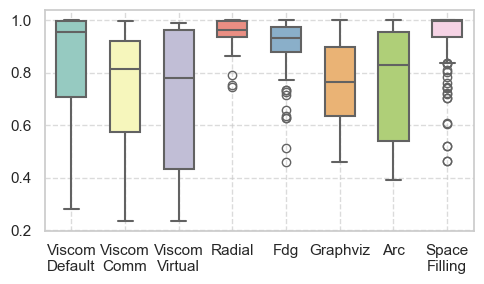

C:\Users\schoc\AppData\Local\Temp\ipykernel_31480\3422243892.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x='type', y='value', ax=ax,
C:\Users\schoc\AppData\Local\Temp\ipykernel_31480\3422243892.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
C:\Users\schoc\AppData\Local\Temp\ipykernel_31480\3422243892.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


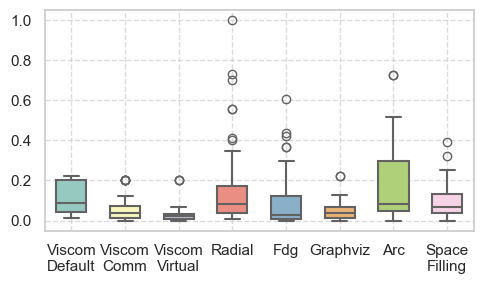

C:\Users\schoc\AppData\Local\Temp\ipykernel_31480\3422243892.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x='type', y='value', ax=ax,
C:\Users\schoc\AppData\Local\Temp\ipykernel_31480\3422243892.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
C:\Users\schoc\AppData\Local\Temp\ipykernel_31480\3422243892.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


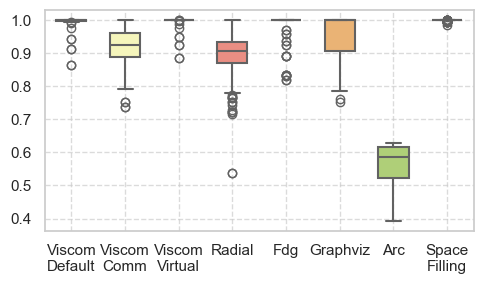

C:\Users\schoc\AppData\Local\Temp\ipykernel_31480\3422243892.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x='type', y='value', ax=ax,
C:\Users\schoc\AppData\Local\Temp\ipykernel_31480\3422243892.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
C:\Users\schoc\AppData\Local\Temp\ipykernel_31480\3422243892.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


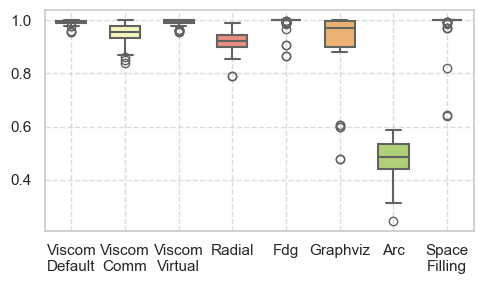

C:\Users\schoc\AppData\Local\Temp\ipykernel_31480\3422243892.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x='type', y='value', ax=ax,
C:\Users\schoc\AppData\Local\Temp\ipykernel_31480\3422243892.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
C:\Users\schoc\AppData\Local\Temp\ipykernel_31480\3422243892.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


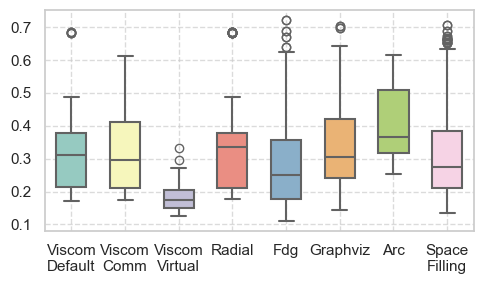

C:\Users\schoc\AppData\Local\Temp\ipykernel_31480\3422243892.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x='type', y='value', ax=ax,
C:\Users\schoc\AppData\Local\Temp\ipykernel_31480\3422243892.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
C:\Users\schoc\AppData\Local\Temp\ipykernel_31480\3422243892.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


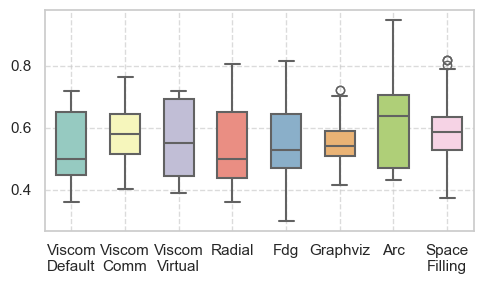

C:\Users\schoc\AppData\Local\Temp\ipykernel_31480\3422243892.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x='type', y='value', ax=ax,
C:\Users\schoc\AppData\Local\Temp\ipykernel_31480\3422243892.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
C:\Users\schoc\AppData\Local\Temp\ipykernel_31480\3422243892.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


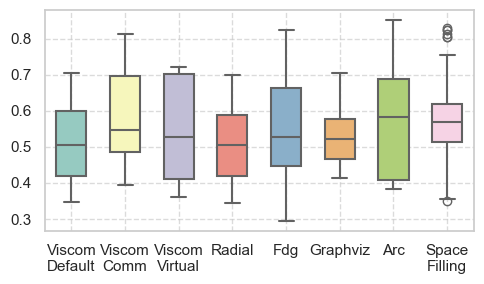

C:\Users\schoc\AppData\Local\Temp\ipykernel_31480\3422243892.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x='type', y='value', ax=ax,
C:\Users\schoc\AppData\Local\Temp\ipykernel_31480\3422243892.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
C:\Users\schoc\AppData\Local\Temp\ipykernel_31480\3422243892.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


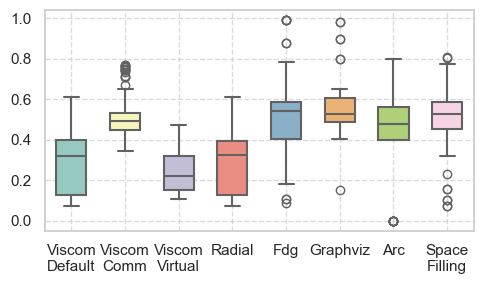

C:\Users\schoc\AppData\Local\Temp\ipykernel_31480\3422243892.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x='type', y='value', ax=ax,
C:\Users\schoc\AppData\Local\Temp\ipykernel_31480\3422243892.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
C:\Users\schoc\AppData\Local\Temp\ipykernel_31480\3422243892.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


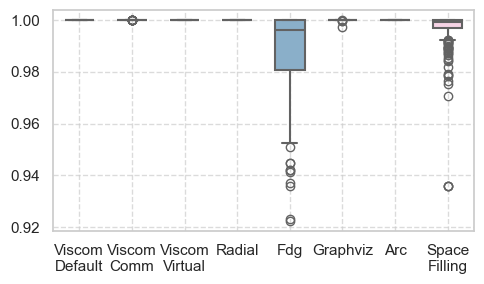

C:\Users\schoc\AppData\Local\Temp\ipykernel_31480\3422243892.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x='type', y='value', ax=ax,
C:\Users\schoc\AppData\Local\Temp\ipykernel_31480\3422243892.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
C:\Users\schoc\AppData\Local\Temp\ipykernel_31480\3422243892.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


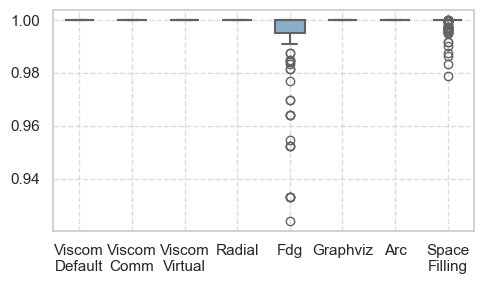

In [17]:
out_dir = "./plots"
if not os.path.exists(out_dir):
    os.makedirs(out_dir)
    
with_title = False

# Set the style of seaborn
sns.set(style="whitegrid")

metrics = metric_list_df['metric'].unique()
for metric in metrics:
    fig, ax = plt.subplots(figsize=(5, 3))
    subset = metric_list_df[metric_list_df['metric'] == metric]
    sns.boxplot(data=subset, x='type', y='value', ax=ax,
                fill=True, palette="Set3", linewidth=1.5, gap=0.3)
    
    if with_title:
        ax.set_title(f'{split_camel_case(metric, " ")}', fontsize=14, pad=15, weight='bold')
    else:
        ax.set_title("")
    # ax.set_xlabel('Layout Algorithm', fontsize=12)
    # ax.set_ylabel('Value', fontsize=12)
    
    ax.set_xlabel("")
    ax.set_ylabel("")
    
    # Add a dashed grid with some transparency
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Set x-tick labels horizontal and offset every second label slightly lower
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    labels = ax.get_xticklabels()
    new_labels = []
    for i, label in enumerate(labels):
        # Offset every second label by lowering its y-position
        # if i % 2 == 1:
        #     # The offset factor (0.05) can be adjusted as needed
        #     pos = label.get_position()
        #     label.set_y(pos[1] - 0.00)
            
        # Convert camel case to words
        text = label.get_text()
        new_text = split_camel_case(text)
        new_labels.append(new_text)
    
    ax.set_xticklabels(new_labels)
    plt.tight_layout()
    plt.show()

    # Save the figure
    out_file = os.path.join(out_dir, f"{metric}.pdf")
    fig.savefig(out_file, bbox_inches='tight', format="pdf")
    # plt.close(fig)

In [13]:
# 'fdg_FDG', 'radial_RadialDefault',
#    'radial_RadialWithBackward', 'viscom_Communities', 'viscom_Virtual',
#    'viscom_Default', 'viscom_CommunitiesWoRotation', 'arc_ArcDefault',
#    'spaceFilling_Hilbert2', 'spaceFilling_Hilbert3', 'spaceFilling_Peano2',
#    'graphviz_GraphvizDot', 'graphviz_GraphvizCirco', 'title', 'nodes',
#    'connections'
col_renames = {
    "viscom_Default": "*(no comm.)",
    "viscom_CommunitiesWoRotation": "*(no rot.)",
    "viscom_Communities": "*(with rot.)",
    "viscom_Virtual": "*(virtual)",
    "fdg_FDG": "FDG",
    "graphviz_GraphvizDot": "DOT",
    "graphviz_GraphvizCirco": "CIRCO",    
    "radial_RadialDefault": "RAD",
    "radial_RadialWithBackward": "RADB",
    "arc_ArcDefault": "ARC",
    "spaceFilling_Hilbert2": "Hil2",
    "spaceFilling_Hilbert3": "Hil3",
    "spaceFilling_Peano2": "Pea2",
}

# Rename the columns
renamed_df = concatenated_df.copy().rename(columns=col_renames)

# Bring the columns in the order of the col_renames dict
ordered_columns = list(col_renames.values()) + ["title", "nodes", "connections", "Metric"]
renamed_df = renamed_df[ordered_columns]
renamed_df

,*(no comm.),*(no rot.),*(with rot.),*(virtual),FDG,DOT,CIRCO,RAD,RADB,ARC,Hil2,Hil3,Pea2,title,nodes,connections,Metric
0,0.9916,0.7931,0.7774,0.9739,0.8093,0.9674,1.0000,0.9916,0.9916,0.0000,1.0000,1.0000,1.0000,Broadcast12,12,182,aspectRatio
1,0.1708,0.2733,0.1584,0.0239,0.0280,0.0590,0.1273,0.3416,0.0932,0.2970,0.1708,0.2112,0.1957,Broadcast12,12,182,edgeCrossings
2,1.0000,0.6877,0.6632,1.0000,1.0000,0.9097,1.0000,0.8758,0.8061,0.5982,1.0000,1.0000,1.0000,Broadcast12,12,182,pathEfficiencyRatio
3,0.9912,0.8162,0.7869,0.9981,1.0000,0.9133,0.9597,0.8810,0.9030,0.5606,1.0000,1.0000,1.0000,Broadcast12,12,182,pathEfficiencyRatioNormalized
4,0.3672,0.3908,0.3702,0.1472,0.3265,0.4102,0.3583,0.3672,0.3672,0.5098,0.3702,0.3750,0.3711,Broadcast12,12,182,stress
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,0.2047,0.2107,0.2135,0.2028,0.1678,0.2214,0.3509,0.2147,0.2147,0.3243,0.2147,0.2205,0.2201,S_50_Sparse,50,66,stress
113,0.3613,0.5708,0.4397,0.4279,0.3590,0.5428,0.5232,0.3597,0.3597,0.4467,0.4187,0.4873,0.5260,S_50_Sparse,50,66,pathContinuity
114,0.3477,0.5591,0.4301,0.4123,0.3591,0.5267,0.5209,0.3432,0.3432,0.4034,0.3987,0.4774,0.5135,S_50_Sparse,50,66,weightedPathContinuity
115,0.3053,0.5425,0.4314,0.1761,0.3779,0.4706,0.5639,0.3064,0.3064,0.4336,0.4370,0.5036,0.6365,S_50_Sparse,50,66,pathAngularPrediction


In [18]:
renamed_df["Metric"].unique()

array(['aspectRatio', 'edgeCrossings', 'pathEfficiencyRatio',
       'pathEfficiencyRatioNormalized', 'stress', 'pathContinuity',
       'weightedPathContinuity', 'pathAngularPrediction',
       'nodeEdgeOverlaps'], dtype=object)

In [19]:
# 'aspectRatio', 'edgeCrossings', 'pathEfficiencyRatio',
    #    'pathEfficiencyRatioNormalized', 'stress', 'pathContinuity',
    #    'weightedPathContinuity', 'pathAngularPrediction',
    #    'nodeEdgeOverlaps'
metric_renames = {
    "aspectRatio": "Aspect Rat.",
    "edgeCrossings": "Edge Cross.",
    "pathEfficiencyRatio": "Path Efficiency",
    "pathEfficiencyRatioNormalized": "Path Efficiency (norm.)",
    "stress": "Stress",
    "pathContinuity": "Path Continuity",
    "weightedPathContinuity": "W. Path Continuity",
    "pathAngularPrediction": "Path Prediction",
    "nodeEdgeOverlaps": "Node Edge Overlaps",
}
    

Layout techniques: ['*(no comm.)', '*(no rot.)', '*(with rot.)', '*(virtual)', 'FDG', 'DOT', 'CIRCO', 'RAD', 'RADB', 'ARC', 'Hil2', 'Hil3', 'Pea2']
Found 9 metrics: ['aspectRatio' 'edgeCrossings' 'pathEfficiencyRatio'
 'pathEfficiencyRatioNormalized' 'stress' 'pathContinuity'
 'weightedPathContinuity' 'pathAngularPrediction' 'nodeEdgeOverlaps']


C:\Users\schoc\AppData\Local\Temp\ipykernel_40416\241944000.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(boxplot_data, labels=layout_techniques, widths=0.6)
C:\Users\schoc\AppData\Local\Temp\ipykernel_40416\241944000.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(boxplot_data, labels=layout_techniques, widths=0.6)
C:\Users\schoc\AppData\Local\Temp\ipykernel_40416\241944000.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(boxplot_data, labels=layout_techniques, widths=0.6)
C:\Users\schoc\AppData\Local\Temp\ipykernel_40416\241944000.py:30: MatplotlibDeprecationWarning: 

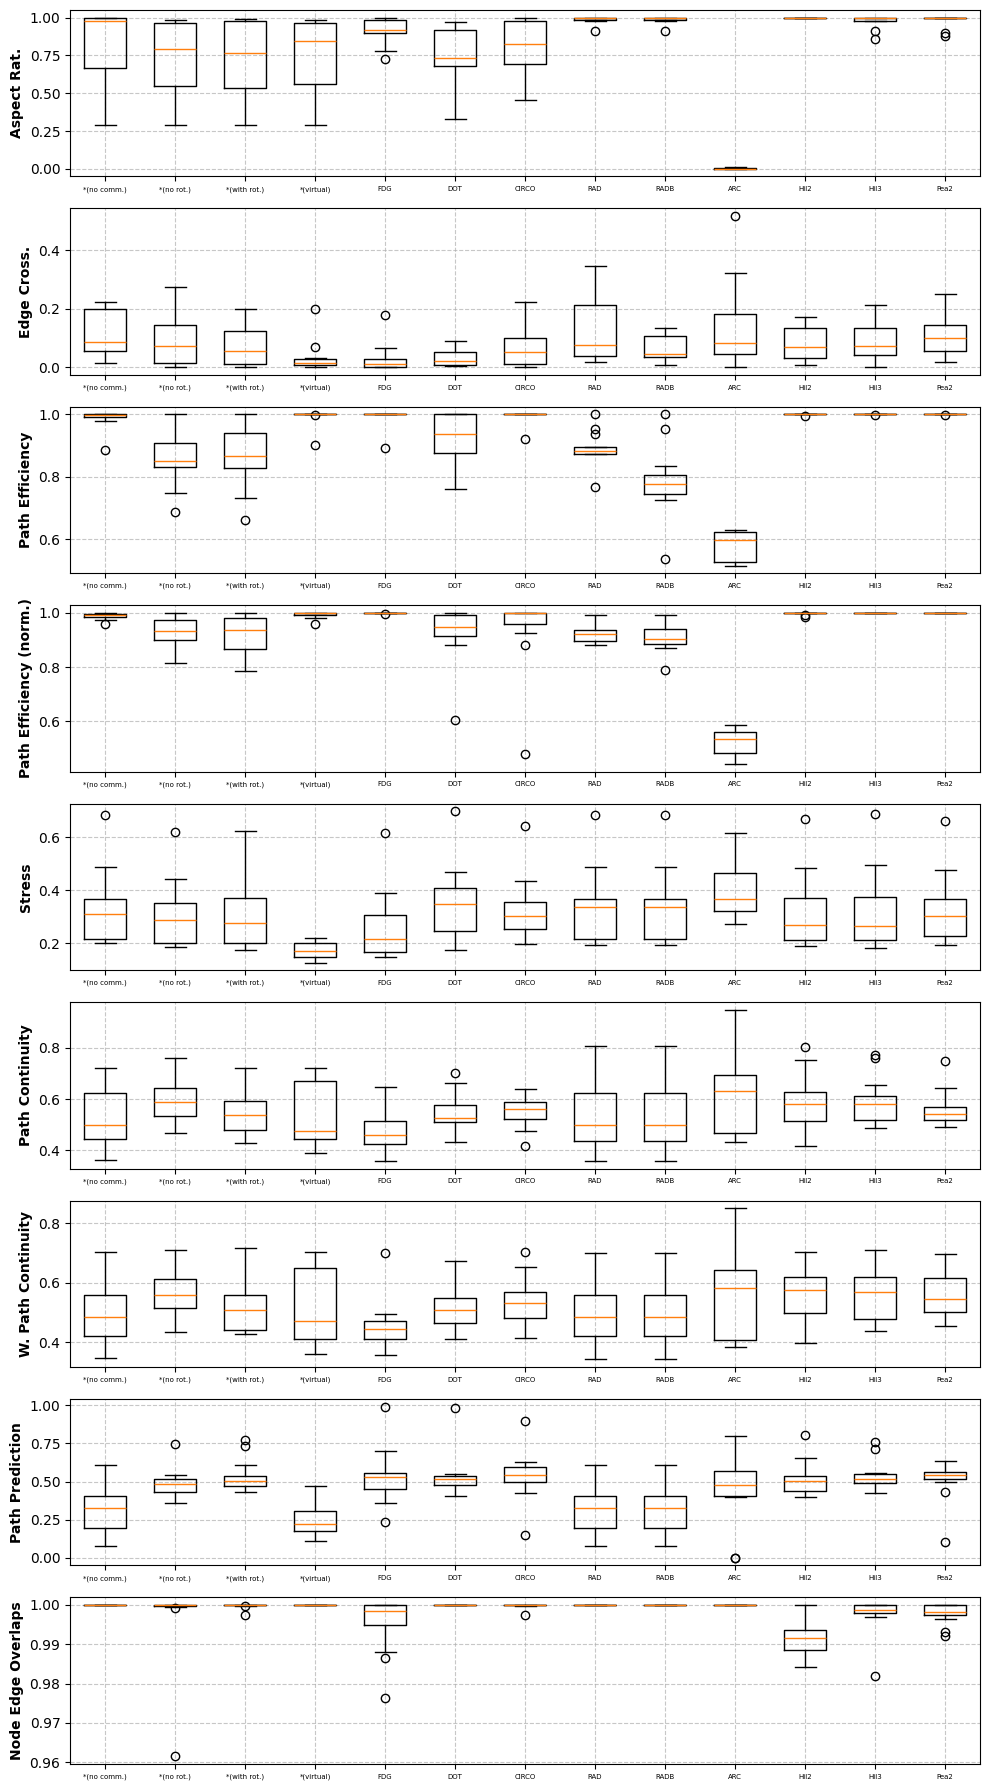

In [20]:
# Fix the column selection - get layout technique columns
plot_df = renamed_df
excluded_cols = ["title", "nodes", "connections", "Metric", "Value"]
layout_techniques = [col for col in plot_df.columns if col not in excluded_cols]
print("Layout techniques:", layout_techniques)

# Get unique metrics
metrics = plot_df["Metric"].unique()
print(f"Found {len(metrics)} metrics: {metrics}")

# Create a figure with subplots - one row per metric
# Make each subplot shorter by reducing the height
fig, axes = plt.subplots(len(metrics), 1, figsize=(10, 2.0*len(metrics)), squeeze=False)

# Plot each metric in its own row
for i, metric in enumerate(metrics):
    ax = axes[i, 0]
    
    # Filter data for this metric
    metric_data = plot_df[plot_df["Metric"] == metric]
    
    # Prepare data for boxplot
    boxplot_data = []
    for technique in layout_techniques:
        # Get values for this technique, excluding NaNs
        values = metric_data[technique].dropna().values
        boxplot_data.append(values)
    
    # Create boxplot with reduced width
    ax.boxplot(boxplot_data, labels=layout_techniques, widths=0.6)
    
    # Move metric title to left as y-axis label
    renamed_metric = metric_renames.get(metric, metric)
    ax.set_ylabel(f'{renamed_metric}', fontsize=10, fontweight='bold')
    ax.set_title('')  # Remove title from above plot
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Make x-tick labels horizontal and smaller
    plt.setp(ax.get_xticklabels(), rotation=0, ha='center', fontsize=5)

# Adjust layout
fig.subplots_adjust(hspace=0.4, top=0.95)
plt.tight_layout()
plt.show()


In [21]:
from IPython.display import FileLink

# Save the figure as a PDF file
output_filename = "metrics_boxplot.pdf"
fig.savefig(output_filename, format="pdf", bbox_inches="tight")
print(f"Plot saved as {output_filename}")

# For direct download in Jupyter notebook
display(FileLink(output_filename))

Plot saved as metrics_boxplot.pdf


c:\Users\schoc\Documents\Studium\HPI\Master Thesis\docs\latex-helper\metrics_boxplot.pdf